<a href="https://colab.research.google.com/github/KavuuMakau/KavuuMakau/blob/main/Part_A_of_Core_statistics_and_visualization_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INDEPENDENT PROJECT FOR STATISTICS AND VISUALIZATION**

**Part 1: Descriptive Statistics** 


# Defining the question

What factors from our dataset can be used to predict which individuals are most likely to have or use a bank account?


# Defining the metric for success

The model that we choose should be able to predict with 85-95% accuracy the status of ownership of a bank account by an individual given the variable attributes in the dataset. 

# Context for the analysis

In East Africa only 13.9% of the adult population has access to or use a commercial bank account. Access to bank accounts enables household to save and facilitate payments while also allowing businesses to build credit-worthiness and build up access to other financial services. Hence, owning or using a bank account is a key indicator if financial inclusion. 

The information from this analysis can be used by financial institutions to tailor products that will entice previously marginalized grous to get bank accounts.

# Experimental design

The steps taken in carrying out this analysis are:
1. Loading our dataset
2. Carrying out data cleaning
3. Carrying out univariate analysis by calculating measures of central tendency and dispersion for numerical variables. Categorical data will be analyzed by calculating frequencies, proportions and percentages. The categorical data will also be visualized using bar charts while the numerical data will be visualized using line charts/histograms and box plots to take note of outliers.
4. Carry out bivariate analysis to establish relationships between two variables.
5. Carry out mutlivariate analysis using data reduction techniques.
6. From the results of the multivariate analysis determine the data attributes that can be used to predict the status of ownership of a bank account by an individual.
7. Report on the findings.

# Data validation

National FinScope surveys from 2006 up to the most recently published demonstrate only a small gain in commercial bank penetration across the East African population, despite commercial banks being the second largest perpetrator of financial inclusion. In Kenya only 38% of the population use commercial banks, compared to 71% of the population that use mobile financial services. Similar statistics ring true across East Africa.

More information can be found [here.](https://www.eadb.org/news-events/financial-technology-in-east-africa#:~:text=In%20Kenya%2C%20formal%20financial%20inclusion,ring%20true%20across%20East%20Africa)

# Importing the relevant libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
url = 'https://bit.ly/FinancialDataset'
Fin_df = pd.read_csv(url)
Fin_df.head()
#observing the first five entries in the dataset

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
#viewing the last five entries of the dataset
Fin_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [4]:
#finding the shape number of entries and attriutes of the dataset
Fin_df.shape
#The dataset has 23524 rows and 13 columns

(23524, 13)

In [5]:
#finding out the datatypes of our data attributes, as this will influence our choice of analysis techniques and visualizations.
Fin_df.info()
#There are only three numerical variables in our dataset, the other ten are categorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


# Defining the columns.

It is important to capture, this information especially next to the df.info() which gives us datatypes of the attributes as this information will influence our decisions while hot-encoding.

Country: Country interviewee is in
Year: Year survey is in

Uniqueid: Unique identifier for each interviewee

Location_type: Type of location; rural or urban

Cellphone_access: If interviewee has access to a cellphone; yes or no

Household_size: Number of people living in one house

Age_of_respondent: The age of the interviewee

Gender_of_respondent: Gender of interviewee; Male or Female

Relationship_with_head: The interviewee's relationship with the head of the house; Head of household, spouse, child, parent, other relative, other non-relatives, don't know

Marital status: The marital status of the interviewee; Married/Living together, Divorced/Separated, Widowed, Single/Never married, Don't know

Education: Highest level of education; No formal education, primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Don't know/RTA

Job_type: Type of job intervieweee has; Farming and fishing, Self employed, Formally employed government, Formally employed private, Informally employed, Remittance dependent, Government dependent, other income, No income, Don't know/Refuse to answer

# Data cleaning

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


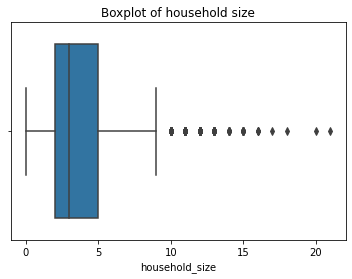

In [6]:
#Finding outliers in the data
#Plotting boxplots for the numerical data
#Household size attrubute
sns.boxplot(Fin_df['household_size'])
plt.title('Boxplot of household size')
plt.show()
#Households with more than 10 individuals are outliers. They are a few and don't seem to affect the median and the mean much, 
#as the data is already skewed to the right, as demonstrated by the histogram below.

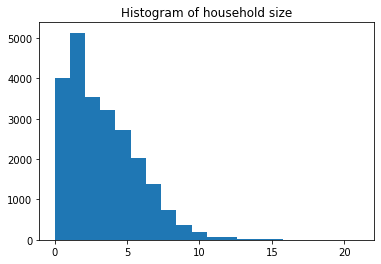

In [7]:
plt.hist(Fin_df['household_size'], bins = 20)
plt.title('Histogram of household size')
plt.show()

<AxesSubplot:>

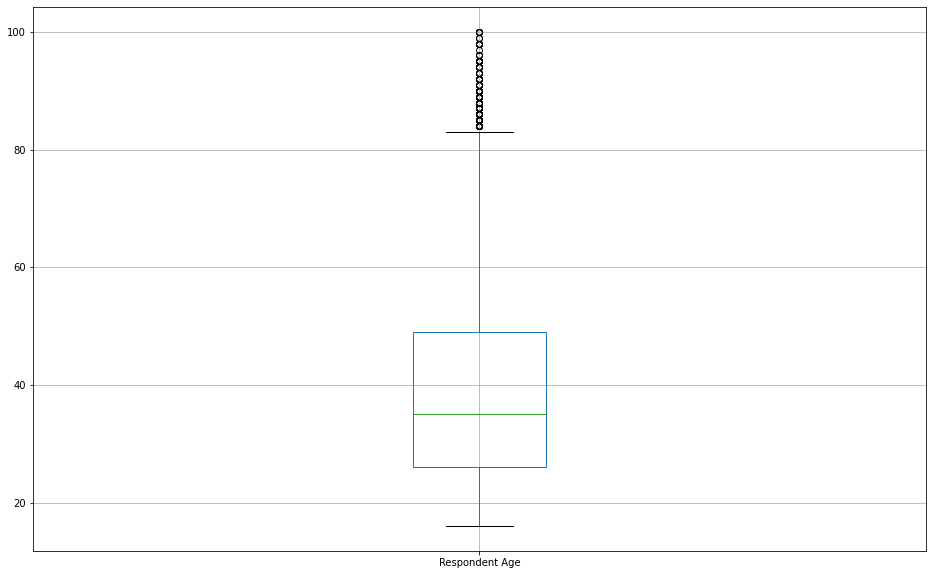

In [8]:
#Age attribute
Fin_df.boxplot(column = ['Respondent Age'],figsize=(16, 10))
#The outliers are all above the age of 80. They are very few and don't seem to affect the mean and the median a lot.

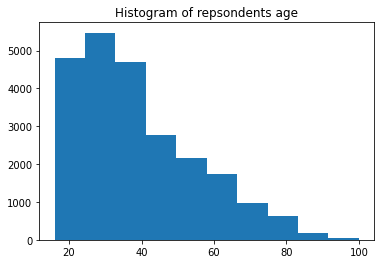

In [9]:
from numpy.ma.core import count
plt.hist(Fin_df['Respondent Age'])
plt.title('Histogram of repsondents age')
plt.show()
#The data is right skewed with few outliers beyond the age of 80.

In [10]:
Fin_df.value_counts(Fin_df['Respondent Age'] > 80)

Respondent Age
False    23185
True       339
dtype: int64

In [11]:
#Looking for missing values
col_names = ['country', 'year', 'uniqueid', 'Has a Bank account','Type of Location', 'Cell Phone Access', 'household_size','Respondent Age', 'gender_of_respondent', 'The relathip with head','marital_status', 'Level of Educuation', 'Type of Job']
for val in col_names:
  print(val,"has", Fin_df[val].isnull().sum(),"null values")

country has 14 null values
year has 0 null values
uniqueid has 0 null values
Has a Bank account has 36 null values
Type of Location has 15 null values
Cell Phone Access has 11 null values
household_size has 28 null values
Respondent Age has 34 null values
gender_of_respondent has 34 null values
The relathip with head has 4 null values
marital_status has 32 null values
Level of Educuation has 29 null values
Type of Job has 30 null values


In [12]:
#Choose to drop the null values particularly in the 'Bank Account' attribute as it is the "target" in this analysis. 
#Furthermore, the dataset is big, so it should remain representative even after dropping the nulls
Fin_df.dropna(axis = 0, inplace = True)

<AxesSubplot:>

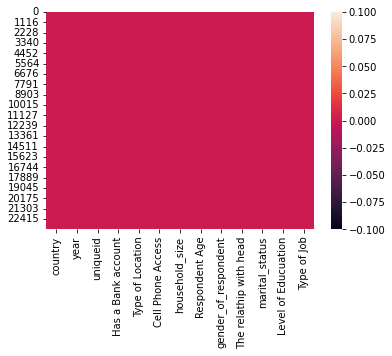

In [13]:
#confirmin that we have dropped all nulls
sns.heatmap(Fin_df.isnull())

In [14]:
Fin_df.shape
#Our data has changed quite a bit after dropping the null values

(23343, 13)

In [15]:
Fin_df.describe()
#getting the statistics for all of the numerical attributes. 
#I don't feel the need to get a description of the categorical variables as most of the results will be NaN
# and the frequencies and counts can be analyzed in the univariate analysis.

,year,household_size,Respondent Age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [16]:
#from the year attribute, there is clearly a mistake as the maximum value is 2056, when the study was conducted in 2016,2017 and 2018.
#checking the unique values in this column
Fin_df['year'].nunique()
#We have six unique values instead of 3

6

In [17]:
#Viewing the wrongly input year entries
Fin_df[Fin_df['year'] > 2018]
#The values that are outside the possible range of years for the study are all greater than 2018, 
#they are 2029, 2056 and 2039. It is highly likely that these were spelling mistakes (due to the closeness of the digits on a keyboard)
#and the numbers should be 2018, 2016 and 2018.

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
213,Kenya,2029,uniqueid_214,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
308,Kenya,2056,uniqueid_309,Yes,Urban,Yes,4.0,40.0,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private
7014,Rwanda,2039,uniqueid_947,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [18]:
#Replacing with the correct year values
Wrong_values = [2029, 2056, 2039]
Correction = [2018, 2016, 2018]
Fin_df['year'] = Fin_df['year'].replace([2029,2056,2039],[2018,2016,2018])

In [19]:
#confirming the change in the year attribute
Fin_df['year'].unique()

array([2018, 2016, 2017])

In [20]:
#checking that the attribues with categorical variables don't have entries that are not part of the given choices as per the given data definition
cols = ['country', 'Has a Bank account','Type of Location', 'Cell Phone Access', 'gender_of_respondent', 'The relathip with head','marital_status', 'Level of Educuation', 'Type of Job'] 

for col in cols:
  print('Unique values in',col,'are',Fin_df[col].unique())
#all categories are fine except "Level of education" which has '6' as one if the responses but it is not defined as one of the expected responses.

Unique values in country are ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
Unique values in Has a Bank account are ['Yes' 'No']
Unique values in Type of Location are ['Rural' 'Urban']
Unique values in Cell Phone Access are ['Yes' 'No']
Unique values in gender_of_respondent are ['Female' 'Male']
Unique values in The relathip with head are ['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
Unique values in marital_status are ['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']
Unique values in Level of Educuation are ['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6']
Unique values in Type of Job are ['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']

In [21]:
#deleting the entry with 'Level of education' == 6
#note: the '6' in this case is treated as a string variable
Fin_df[Fin_df['Level of Educuation'] == '6'].count()
#27 entries have "6" as a level of education

country                   27
year                      27
uniqueid                  27
Has a Bank account        27
Type of Location          27
Cell Phone Access         27
household_size            27
Respondent Age            27
gender_of_respondent      27
The relathip with head    27
marital_status            27
Level of Educuation       27
Type of Job               27
dtype: int64

In [22]:
#Although the levels of education denote hierarchy there is no way to prove that 6 (assuming it was an ordinal response) 
#could be higher up the heirarchy or low,
#hence it is better to drop all variables with 6
Fin_df =Fin_df[Fin_df['Level of Educuation'] != '6']
Fin_df['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [23]:
Fin_df.shape

(23316, 13)

The data is now clean (i.e. free of anomalies, free of null values and detrimental outliers) It is safe to proceed to variable analysis.


# Univariate Analysis

**Categorical variables**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


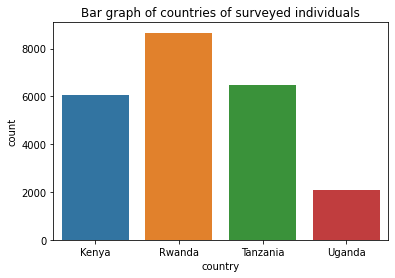

Rwanda      8666
Tanzania    6497
Kenya       6064
Uganda      2089
Name: country, dtype: int64

In [24]:
#since my data is mostly categorical, the dominant method of visualization here will be bar plots.
#Frequency tables for the given variables are right under the bar graphs, for ease of understanding of the visualizations.
sns.countplot(Fin_df['country'])
plt.title("Bar graph of countries of surveyed individuals")
plt.show()

Fin_df['country'].value_counts()
#most of the respondents are from Rwanda, followed by Tanzania, Kenya then Uganda.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


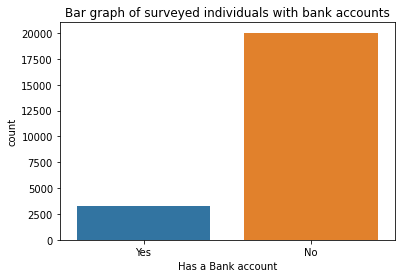

No     20024
Yes     3292
Name: Has a Bank account, dtype: int64

In [25]:
sns.countplot(Fin_df['Has a Bank account'])
plt.title("Bar graph of surveyed individuals with bank accounts")
plt.show()

Fin_df['Has a Bank account'].value_counts()
#a disproportionate number of people do not have bank accounts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


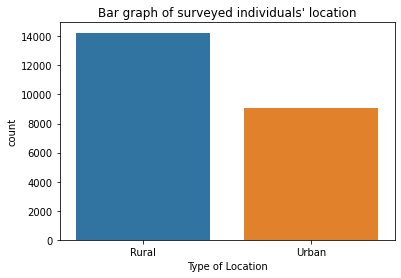

Rural    14248
Urban     9068
Name: Type of Location, dtype: int64

In [26]:
sns.countplot(Fin_df['Type of Location'])
plt.title("Bar graph of surveyed individuals' location")
plt.show()

Fin_df['Type of Location'].value_counts()
#most of the respondents are from the rural parts of East Africa

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


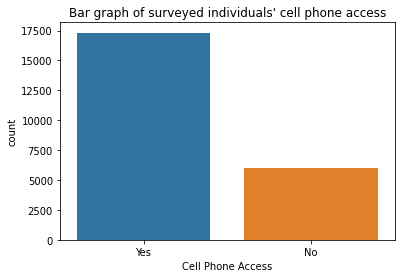

Yes    17318
No      5998
Name: Cell Phone Access, dtype: int64

In [27]:
sns.countplot(Fin_df['Cell Phone Access'])
plt.title("Bar graph of surveyed individuals' cell phone access")
plt.show()

Fin_df['Cell Phone Access'].value_counts()
#most of the respondents have access to cell phones

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


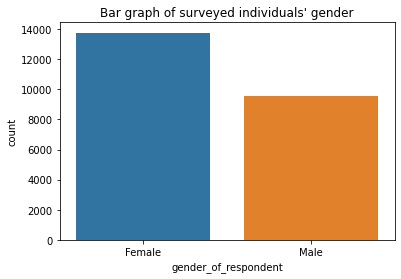

Female    13749
Male       9567
Name: gender_of_respondent, dtype: int64

In [28]:
sns.countplot(Fin_df['gender_of_respondent'])
plt.title("Bar graph of surveyed individuals' gender")
plt.show()

Fin_df['gender_of_respondent'].value_counts()
#most of the respondents are female

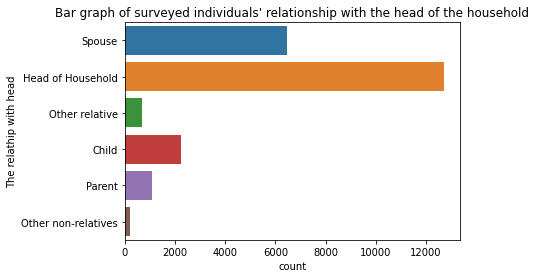

Head of Household      12715
Spouse                  6460
Child                   2221
Parent                  1069
Other relative           662
Other non-relatives      189
Name: The relathip with head, dtype: int64

In [29]:
sns.countplot(y = Fin_df['The relathip with head'])
plt.title("Bar graph of surveyed individuals' relationship with the head of the household")
plt.show()

Fin_df['The relathip with head'].value_counts()
#most of the respondents are heads of their households.

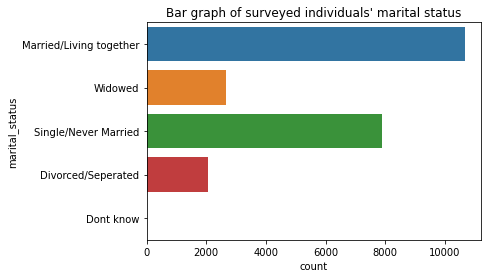

Married/Living together    10684
Single/Never Married        7900
Widowed                     2677
Divorced/Seperated          2047
Dont know                      8
Name: marital_status, dtype: int64

In [30]:
sns.countplot(y = Fin_df['marital_status'])
plt.title("Bar graph of surveyed individuals' marital status")
plt.show()

Fin_df['marital_status'].value_counts()
#most od the respondents are married/living together

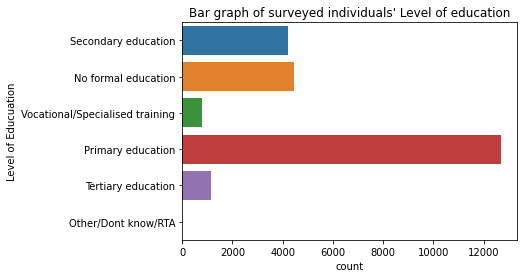

Primary education                  12689
No formal education                 4467
Secondary education                 4207
Tertiary education                  1144
Vocational/Specialised training      801
Other/Dont know/RTA                    8
Name: Level of Educuation, dtype: int64

In [31]:
sns.countplot(y = Fin_df['Level of Educuation'])
plt.title("Bar graph of surveyed individuals' Level of education")
plt.show()

Fin_df['Level of Educuation'].value_counts()
#most of the respondents had attained primary school education as their highest level of education

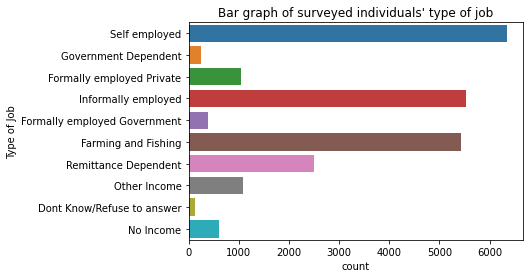

Self employed                   6357
Informally employed             5535
Farming and Fishing             5422
Remittance Dependent            2507
Other Income                    1076
Formally employed Private       1047
No Income                        615
Formally employed Government     386
Government Dependent             246
Dont Know/Refuse to answer       125
Name: Type of Job, dtype: int64

In [32]:
sns.countplot(y = Fin_df['Type of Job'])
plt.title("Bar graph of surveyed individuals' type of job")
plt.show()

Fin_df['Type of Job'].value_counts()
#most of the respondents are self-employed, followed closely by respndents who are either informally employed or engage in farming and fishing


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


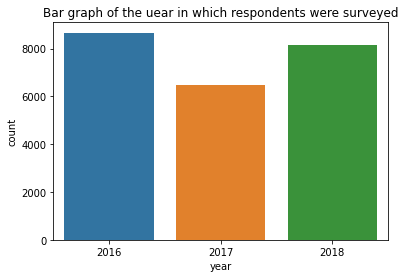

2016    8666
2018    8153
2017    6497
Name: year, dtype: int64

In [33]:
#Later took an interest in how much of the data is from which specific year, so I chose to analyze this variable like a categorical vairable as well
sns.countplot(Fin_df['year'])
plt.title("Bar graph of the uear in which respondents were surveyed")
plt.show()

Fin_df['year'].value_counts()
#The highest number of responses are from 2016

**Numerical variables**

There are three variables with numerical datatypes according to the dataframe.info(), namely "year', "household_size" and "Respondent Age". The 'year' attribute is best if treated like a categorical variable (so this is something that will need to be altered during multivariate analysis and the subsequent prediction). Unique_id should ideally be a nmumerical variable, however, its function is overlapping with the dataframe index and can in fact be dropped, to ease up analysis tasks later. These are the reasons why I will only explore "household size" and "Respondent Age" in this section, as they are the only truly numerical variables.

In [34]:
#analysing 'household size'.

#measures of central tendency
#mean
mean = Fin_df['household_size'].mean()

#median
med = Fin_df['household_size'].median()

#mode
mod = Fin_df['household_size'].mode()

print("For the column 'household size' Mean is,", mean,"median is,",med,"and mode is",mod)
#The average number of people per household is 3.6885 (~4 people), the median value is 3, while most housholds have 2 people.

For the column 'household size' Mean is, 3.688497169325785 median is, 3.0 and mode is 0    2.0
dtype: float64


In [35]:
#I initailly thought that the mode was zero, which made me to look into how many people could have responded with zero to this question.
#Since it's not possible to have a househols with no people in it, I chose to delete those entries as it doesn't make sense logically
Fin_df[Fin_df['household_size'] == 0].count()
#There are 36 such entries in the dataset and given the size of the dataset it should not affect the representative nature of the dataset
Fin_df = Fin_df[Fin_df['household_size'] != 0]
Fin_df.shape

#note: This did not affect the previously calculated measures of cetral tendency. Mean was still approximately 3.69, mode was 3 and median is 2.

(23280, 13)

In [36]:
#measures of dispersion for 'household size'.

#Variance 
variance = Fin_df['household_size'].var()
print('Variance is:',+variance)

#standard deviation
standard_dev = Fin_df['household_size'].std()
print('Standard deviation is:',+standard_dev)

#finding range
max_hs = Fin_df['household_size'].max()
min_hs = Fin_df['household_size'].min()
print('The minimum and maximum for household size is:',+min_hs,'and',+max_hs,'respectivelly.')

rng = max_hs - min_hs
print('The range for household size is:',+rng)

#finding Inter-qaurtile range
Q1_hs, Q2_hs, Q3_hs = Fin_df['household_size'].quantile([0.25,0.5,0.75])
IQR = Q3_hs - Q1_hs
print('Interquartile range for household size is:',+IQR)

Variance is: 5.188797505872882
Standard deviation is: 2.2778932165211088
The minimum and maximum for household size is: 1.0 and 21.0 respectivelly.
The range for household size is: 20.0
Interquartile range for household size is: 3.0


In [37]:
#Calculating skewness and kurtosis for 'household size'.
sk= Fin_df['household_size'].skew()
ku= Fin_df['household_size'].kurt()

print('Skewness is:',+sk,'and kurtosis is',+ku,'for the column household size')
#The skewness has a score of ~1.0, this means that the data has a moderate positive skew 
#i.e. it is relativley symmetrical in comparison to a normal distribution with a slight tail to the right
#The kurtosis score is ~1.16, this is less than the score for a normal distribution, which is 3
#Hence the data is platykurtic and it tends to produce fewer and less extreme outliers than the normal distribution.

Skewness is: 0.9779589032417252 and kurtosis is 1.1599104517805614 for the column household size


In [38]:
#Calculating the summary statistics for 'Respondent Age'.

#measures of central tendency
#mean
mean = Fin_df['Respondent Age'].mean()

#median
med = Fin_df['Respondent Age'].median()

#mode
mod = Fin_df['Respondent Age'].mode()

print("For the column 'Respondent Age' Mean is,", mean,"median is,",med,"and mode is",mod)
#The mean age of the respondents is 38.76, the median is 35 and the mode is 30.

For the column 'Respondent Age' Mean is, 38.76546391752577 median is, 35.0 and mode is 0    30.0
dtype: float64


In [39]:
#measures of dispersion for 'Respondent Age'.

#Variance 
variance = Fin_df['Respondent Age'].var()
print('Variance is:',+variance)

#standard deviation
standard_dev = Fin_df['Respondent Age'].std()
print('Standard deviation is:',+standard_dev)

#finding range
max_ra = Fin_df['Respondent Age'].max()
min_ra = Fin_df['Respondent Age'].min()
print('The minimum and maximum values are',+min_ra,'and',+max_ra,'respectively.')

rng = max_ra - min_ra
print("The range of the respondents' age is",+rng)

#finding Inter-qaurtile range
Q1_ra, Q2_ra, Q3_ra = Fin_df['Respondent Age'].quantile([0.25,0.5,0.75])
IQR = Q3_ra - Q1_ra
print('The interquantile range is',+IQR)

Variance is: 271.4200538249095
Standard deviation is: 16.474830919463468
The minimum and maximum values are 16.0 and 100.0 respectively.
The range of the respondents' age is 84.0
The interquantile range is 23.0


In [40]:
#Calculating skewness and kurtosis for 'Respondent Age'.
sk= Fin_df['Respondent Age'].skew()
ku= Fin_df['Respondent Age'].kurt()

print('The skewness is',+sk,'and the kurtosis is',+ku,"for the respondents' age column")
#The data in the column is moderately positively skewed i.e. it has a slight tail to the right
#The data in the column is very thin tailed and doesn't have extreme outliers in comparison to the normal distribution

The skewness is 0.8388653119192585 and the kurtosis is 0.0953368515789399 for the respondents' age column


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


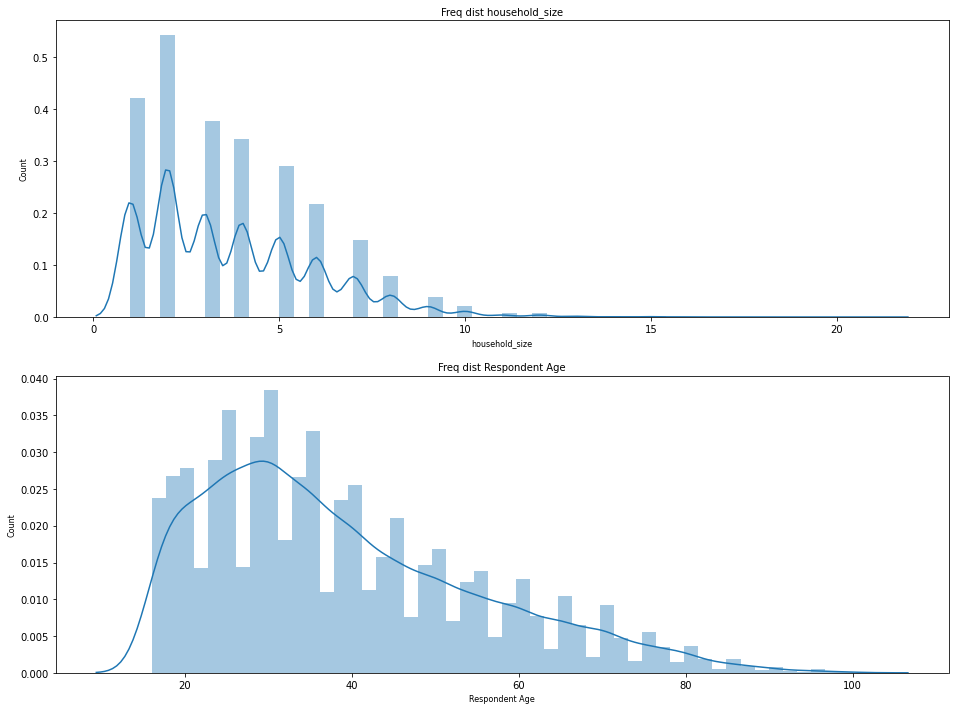

In [41]:
#distribution plots for the two numerical variables
col_names = ['household_size','Respondent Age']
fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i,col_val in enumerate(col_names):

    sns.distplot(Fin_df[col_val],hist = True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

#Both features are right skewed

# Bivariate Analysis

In [42]:
#carrying out the bivariate analysis using sns.pairplot().
#I chose to drop the uniqueid attribute because it doesn't add any value as the dataframe is already indexed.
#Also,with all of the null values that have been dropped during EDA, the 'uniqueid' attribute is illogical.

Fin_df = Fin_df.drop(['uniqueid'], axis = 1)

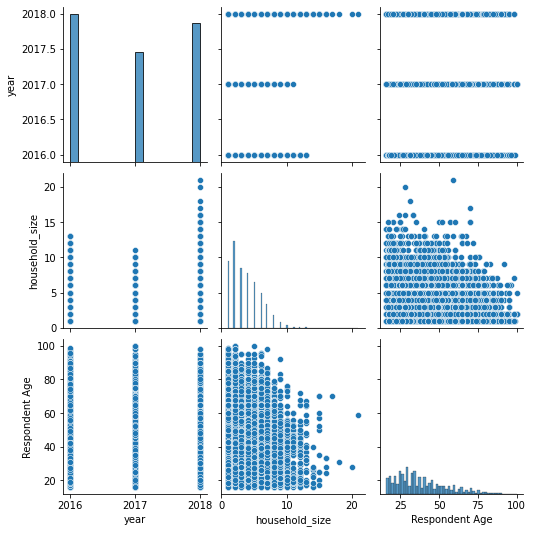

In [43]:
sns.pairplot(Fin_df)

#Nothing really stood out in the output.

<AxesSubplot:xlabel='country', ylabel='count'>

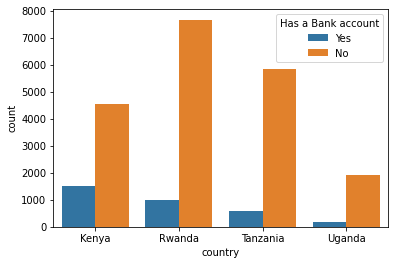

In [44]:
#I chose to first start by analysing the target variable which is "Has a Bank account", against the other variables which will become our feature variables.

#visualizing the number of respondents from each country and their bank account ownership status
Fin_df['Has a Bank account'].value_counts()
sns.countplot(x='country',hue='Has a Bank account',data= Fin_df)
#it is intersting that Kenya has the highest number of bank account owners yet response-wise,
# the number of respondents from Kenya are less than those from Rwanda and Tanzania

<AxesSubplot:xlabel='year', ylabel='count'>

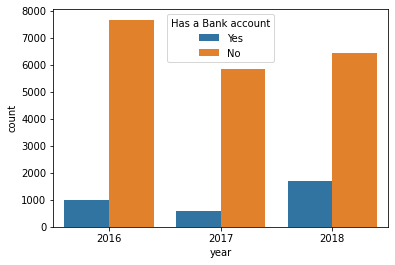

In [45]:
#checking for the number of people who had bank accounts over the course of the three years
Fin_df['Has a Bank account'].value_counts()
sns.countplot(x='year',hue='Has a Bank account',data= Fin_df)
#The number of bank account owners might have increased over the years because while 2016 had the mostr respondents,
#the number of bank owners for 2018 are higher. 2017 had the lowest number of respondents so it makes sense why it has the lowest numbers for both bank account ownership and those who don't own bank accounts

<AxesSubplot:xlabel='Type of Location', ylabel='count'>

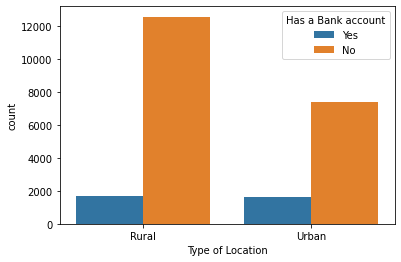

In [46]:
Fin_df['Has a Bank account'].value_counts()
sns.countplot(x='Type of Location',hue='Has a Bank account',data= Fin_df)
#Despite most of the respondents coming from the rural areas,
#it seems like bank account ownership for both rural and urban areas is almost equal

<AxesSubplot:xlabel='Cell Phone Access', ylabel='count'>

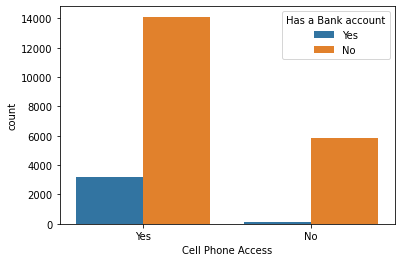

In [47]:
Fin_df['Has a Bank account'].value_counts()
sns.countplot(x='Cell Phone Access',hue='Has a Bank account',data= Fin_df)
#most of the respondents who have bank accounts also have cell phone access

<AxesSubplot:xlabel='count', ylabel='household_size'>

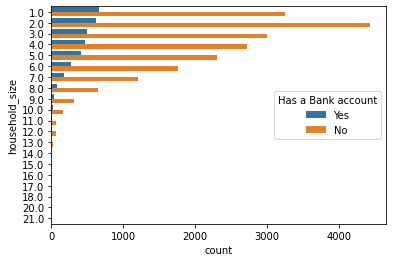

In [48]:
Fin_df['Has a Bank account'].value_counts()
sns.countplot(y='household_size',hue='Has a Bank account',data= Fin_df)
#the likelihood of someone having a bank account decreases as the household size increases

<AxesSubplot:xlabel='gender_of_respondent', ylabel='count'>

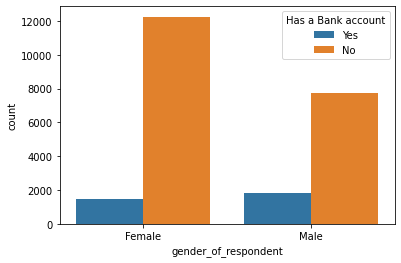

In [49]:
Fin_df['Has a Bank account'].value_counts()
sns.countplot(x='gender_of_respondent',hue='Has a Bank account',data= Fin_df)
#despite there being more female respondents there are still less female bank account owners than male bank account owners

<AxesSubplot:xlabel='count', ylabel='The relathip with head'>

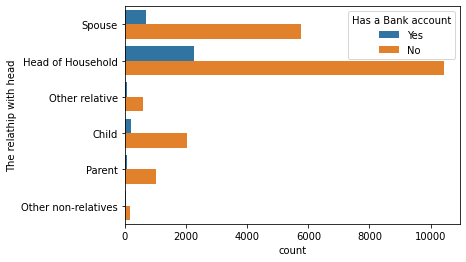

In [50]:
Fin_df['Has a Bank account'].value_counts()
sns.countplot(y='The relathip with head',hue='Has a Bank account',data= Fin_df)
#most of the bank account owners are the head of their households

<AxesSubplot:xlabel='count', ylabel='marital_status'>

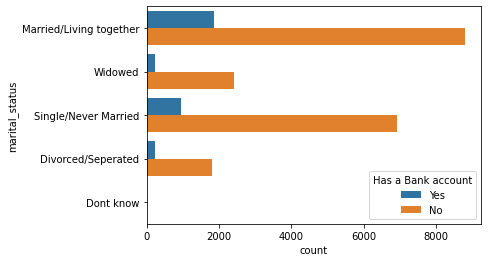

In [51]:
Fin_df['Has a Bank account'].value_counts()
sns.countplot(y='marital_status',hue='Has a Bank account',data= Fin_df)
#most bank account owners are married/living together

<AxesSubplot:xlabel='count', ylabel='Level of Educuation'>

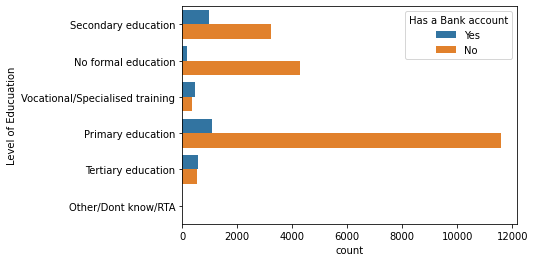

In [52]:
Fin_df['Has a Bank account'].value_counts()
sns.countplot(y='Level of Educuation',hue='Has a Bank account',data= Fin_df)
#most bank account owners have primary level of education but that is probably because most of the respondents have primary education
#It is interesting that for the individuals with tertiary education and vocational/specialised training, more have bank accounts than those who don't.

<AxesSubplot:xlabel='count', ylabel='Type of Job'>

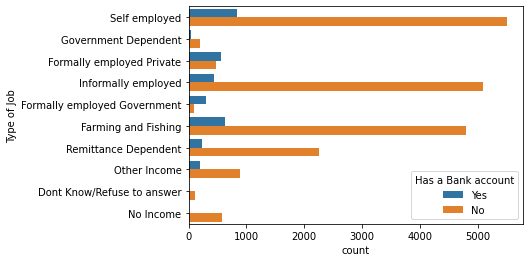

In [53]:
Fin_df['Has a Bank account'].value_counts()
sns.countplot(y='Type of Job',hue='Has a Bank account',data= Fin_df)

<AxesSubplot:xlabel='Has a Bank account', ylabel='Respondent Age'>

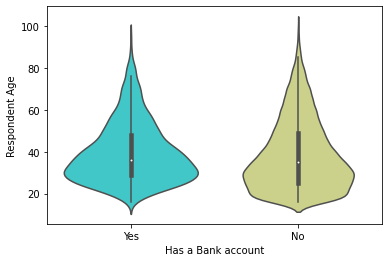

In [54]:
#analyzing respondent age against bank account ownership
sns.violinplot(x="Has a Bank account", y="Respondent Age", data=Fin_df,palette='rainbow')
#Bank account owners are more likely to be in their 30s

<AxesSubplot:xlabel='Has a Bank account', ylabel='Respondent Age'>

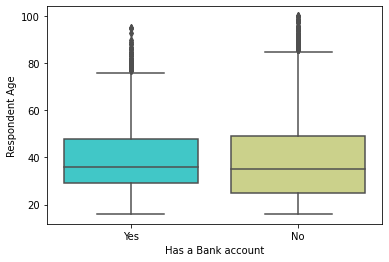

In [55]:
sns.boxplot(x='Has a Bank account',y='Respondent Age',data=Fin_df,palette='rainbow')

After looking at the bivariate visualizations, it seems like "Cell phone access" has quite an impact(or is strong indicator of ) on bank account ownership. So I decided to look for a way to analyze even the categorcical variables against one another. 

In [56]:
#installing the necessary libraries
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Please make a point of restarting your runtime after installing dython to make sure that the next lines of code work.

In [57]:
#importing necessary library to carry out correlation
from dython.nominal import associations

In [58]:
#importing a library to identify nominal variables
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(Fin_df)
categorical_features

['country',
 'Has a Bank account',
 'Type of Location',
 'Cell Phone Access',
 'gender_of_respondent',
 'The relathip with head',
 'marital_status',
 'Level of Educuation',
 'Type of Job']

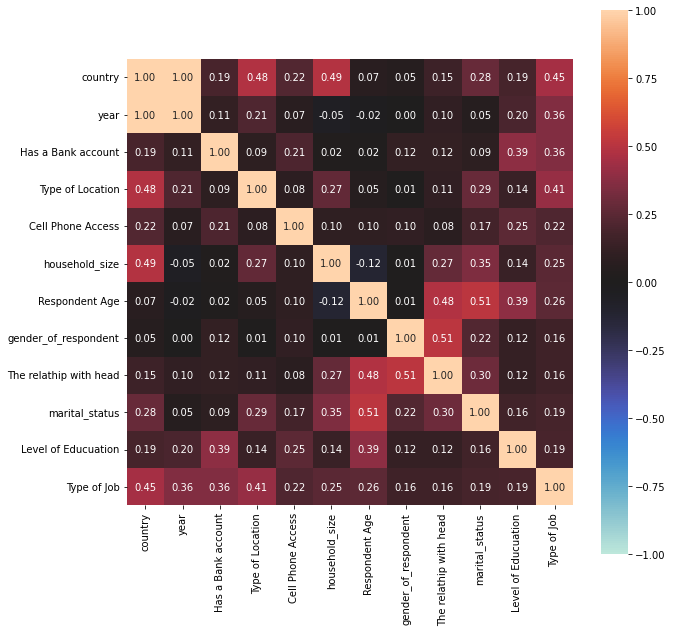

In [59]:
#generating correlation matrix and heatmap
#using associations() to generate the correlation matrix for the entire dataset

complete_correlation= associations(Fin_df, filename= 'complete_correlation.png', figsize=(10,10))

The above line of code (*i.e. the use of associations()*) calculates the correlation/strength-of-association of features in the data-set with both categorical and continuous features using: Pearson’s R for continuous-continuous cases, Correlation Ratio for categorical-continuous cases, Cramer’s V or Theil’s U for categorical-categorical cases.

associations function returns a dictionary that contains:

‘corr’ as key : A DataFrame of the correlation between all features.
‘ax’ as value: A matplotlib axe which contains the correlation heatmap.

In [60]:
#getting a better visualization
df_complete_corr=complete_correlation['corr']
df_complete_corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
country,1.00,1.00,0.19,0.48,0.22,0.49,0.07,0.05,0.15,0.28,0.19,0.45
year,1.00,1.00,0.11,0.21,0.07,-0.05,-0.02,0.00,0.10,0.05,0.20,0.36
Has a Bank account,0.19,0.11,1.00,0.09,0.21,0.02,0.02,0.12,0.12,0.09,0.39,0.36
Type of Location,0.48,0.21,0.09,1.00,0.08,0.27,0.05,0.01,0.11,0.29,0.14,0.41
Cell Phone Access,0.22,0.07,0.21,0.08,1.00,0.10,0.10,0.10,0.08,0.17,0.25,0.22
household_size,0.49,-0.05,0.02,0.27,0.10,1.00,-0.12,0.01,0.27,0.35,0.14,0.25
Respondent Age,0.07,-0.02,0.02,0.05,0.10,-0.12,1.00,0.01,0.48,0.51,0.39,0.26
gender_of_respondent,0.05,0.00,0.12,0.01,0.10,0.01,0.01,1.00,0.51,0.22,0.12,0.16
The relathip with head,0.15,0.10,0.12,0.11,0.08,0.27,0.48,0.51,1.00,0.30,0.12,0.16
marital_status,0.28,0.05,0.09,0.29,0.17,0.35,0.51,0.22,0.30,1.00,0.16,0.19


In [61]:
#carrying out the pearson correlation for the only two numerical columns in my dataset as well as to confirm that it matches the heat map above
p_corr = np.corrcoef(Fin_df['household_size'],Fin_df['Respondent Age'])
print(p_corr)
#the correlation coefficient of -0.1172 matches the one in the heatmap of -0.12.

[[ 1.         -0.11720495]
 [-0.11720495  1.        ]]


In [62]:
Fin_df.columns.values

array(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'], dtype=object)

# Multivariate analysis

Most of the columns contain categorical data hence there is need to encode the data. I will create dummy variables for the categorical variables.

In [63]:
#getting the details about the columns in the datafram
Fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23280 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23280 non-null  object 
 1   year                    23280 non-null  int64  
 2   Has a Bank account      23280 non-null  object 
 3   Type of Location        23280 non-null  object 
 4   Cell Phone Access       23280 non-null  object 
 5   household_size          23280 non-null  float64
 6   Respondent Age          23280 non-null  float64
 7   gender_of_respondent    23280 non-null  object 
 8   The relathip with head  23280 non-null  object 
 9   marital_status          23280 non-null  object 
 10  Level of Educuation     23280 non-null  object 
 11  Type of Job             23280 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.8+ MB


In [67]:
#dummying all categorical variables
#country
country = pd.get_dummies(Fin_df['country'], drop_first = True)

#Type of location
Location = pd.get_dummies(Fin_df['Type of Location'], drop_first = True )

#Cell phone access
Cell_access = pd.get_dummies(Fin_df['Cell Phone Access'], drop_first = True)

#Gender of respondent
Gender = pd.get_dummies(Fin_df['gender_of_respondent'], drop_first = True)

#Relationship with head
Head_rel = pd.get_dummies(Fin_df['The relathip with head'], drop_first = True)

#Marital status
Marital = pd.get_dummies(Fin_df['marital_status'], drop_first = True)
                        
#Level of education
Education = pd.get_dummies(Fin_df['Level of Educuation'], drop_first = True)

#Type of job
Job = pd.get_dummies(Fin_df['Type of Job'], drop_first = True)


In [69]:
#dropping all columns that will be replaced by dummies
Fin_df.drop(['country','Type of Location','Cell Phone Access','gender_of_respondent','The relathip with head','marital_status','Level of Educuation','Type of Job'], axis = 1, inplace = True)

#concatenating the dummy variables
Fin_df = pd.concat([Fin_df, country, Location, Cell_access,Gender, Head_rel, Marital, Education, Job], axis= 1)

In [70]:
#viewing new columns
print(Fin_df.columns)

Index(['year', 'Has a Bank account', 'household_size', 'Respondent Age',
       'Rwanda', 'Tanzania', 'Uganda', 'Urban', 'Yes', 'Male',
       'Head of Household', 'Other non-relatives', 'Other relative', 'Parent',
       'Spouse', 'Dont know', 'Married/Living together',
       'Single/Never Married', 'Widowed', 'Other/Dont know/RTA',
       'Primary education', 'Secondary education', 'Tertiary education',
       'Vocational/Specialised training', 'Farming and Fishing',
       'Formally employed Government', 'Formally employed Private',
       'Government Dependent', 'Informally employed', 'No Income',
       'Other Income', 'Remittance Dependent', 'Self employed'],
      dtype='object')


In [71]:
#renaming 'Has a bank account' column to make next step easier
Fin_df.rename(columns = {'Has a Bank account': 'Bank_ownership'}, inplace = True)

In [72]:
#creating labels dataframe for the bank account ownership column
labels = pd.DataFrame(Fin_df['Bank_ownership'])
labels.Bank_ownership[labels.Bank_ownership == "Yes"] = 1
labels.Bank_ownership[labels.Bank_ownership == "No"] = 0

Fin_df = Fin_df.drop(['Bank_ownership'], axis = 1)
Fin_df = Fin_df.apply(pd.to_numeric)
labels = labels.apply(pd.to_numeric)

In [74]:
#splitting our data into train and test datasets

#import the relevant libraries first
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [75]:
#carrying out linear discriminant analysis and possibly logistic regression if time allows
#we already have our feature and label dataset
#dividing into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(Fin_df, labels, test_size = 0.3, random_state = 0)

In [76]:
#feature calling because this only works on standardized data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [77]:
#performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
#Training and making predictions
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [83]:
#Evaluate performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print('Accuracy'+str(accuracy_score(Y_test, y_pred)))

#the model predicts with 87.96% accuracy the likelihood of owning a bank account given the variable attributes

[[5901   82]
 [ 759  242]]
Accuracy0.879581901489118


In [64]:
Fin_df.columns.values

array(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'], dtype=object)